# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [4]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

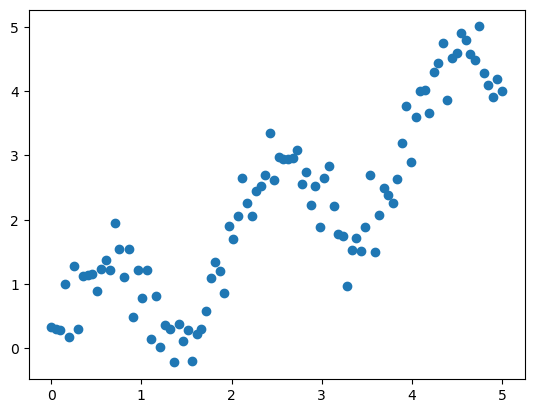

In [5]:
plt.scatter(x,y)

#### nonlinear

In [6]:
regr_lin = LinearRegression()

In [7]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [8]:
regr_lin.fit(X,y)

LinearRegression()

0.5691830896312023


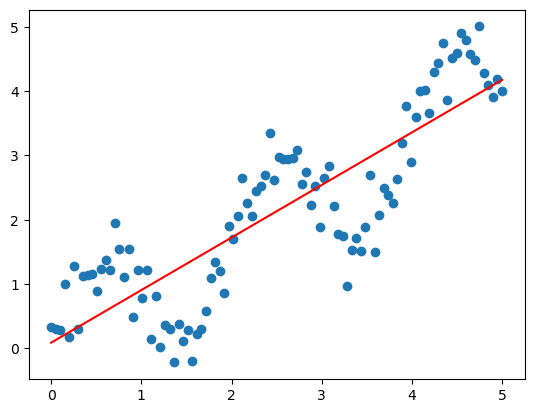

In [9]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [10]:
print(x.shape)

(100,)


In [20]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [21]:
regr_poly = LinearRegression()

In [22]:
regr_poly.fit(X_poly, y)

LinearRegression()

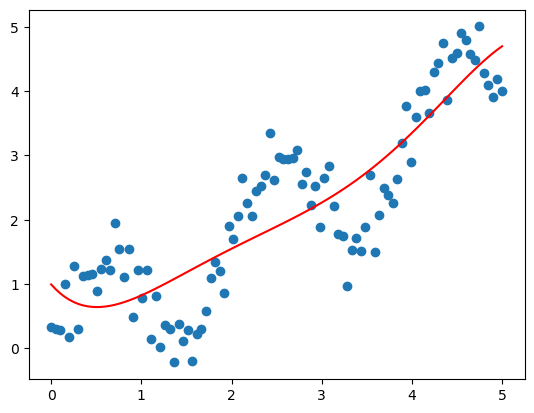

In [23]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [24]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.59432726  2.2221813  -0.98448287  0.19998763 -0.01465915]
interception:  0.9929693139931886


In [30]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.99296931, 0.91799046, 0.85360521, 0.79909873, 0.75378625,
       0.71701249, 0.6881511 , 0.66660404, 0.65180107, 0.6431991 ,
       0.64028166, 0.6425583 , 0.64956402, 0.66085869, 0.67602648,
       0.69467525, 0.71643603, 0.74096239, 0.76792987, 0.79703543,
       0.82799684, 0.86055213, 0.89445898, 0.92949418, 0.96545301,
       1.00214871, 1.03941184, 1.07708978, 1.11504607, 1.15315989,
       1.19132546, 1.22945148, 1.26746052, 1.30528845, 1.3428839 ,
       1.38020763, 1.41723198, 1.4539403 , 1.49032634, 1.5263937 ,
       1.56215525, 1.59763253, 1.63285519, 1.66786042, 1.70269235,
       1.73740148, 1.77204413, 1.80668179, 1.84138064, 1.87621088,
       1.91124621, 1.94656324, 1.98224089, 2.01835984, 2.05500194,
       2.09224962, 2.13018535, 2.168891  , 2.20844733, 2.24893336,
       2.29042583, 2.33299858, 2.37672201, 2.42166249, 2.46788178,
       2.51543644, 2.56437727, 2.61474874, 2.66658837, 2.71992621,
       2.77478419, 2.83117563, 2.88910459, 2.94856531, 3.00954

In [31]:
regr_poly.predict(X_poly)

array([0.99296931, 0.91799046, 0.85360521, 0.79909873, 0.75378625,
       0.71701249, 0.6881511 , 0.66660404, 0.65180107, 0.6431991 ,
       0.64028166, 0.6425583 , 0.64956402, 0.66085869, 0.67602648,
       0.69467525, 0.71643603, 0.74096239, 0.76792987, 0.79703543,
       0.82799684, 0.86055213, 0.89445898, 0.92949418, 0.96545301,
       1.00214871, 1.03941184, 1.07708978, 1.11504607, 1.15315989,
       1.19132546, 1.22945148, 1.26746052, 1.30528845, 1.3428839 ,
       1.38020763, 1.41723198, 1.4539403 , 1.49032634, 1.5263937 ,
       1.56215525, 1.59763253, 1.63285519, 1.66786042, 1.70269235,
       1.73740148, 1.77204413, 1.80668179, 1.84138064, 1.87621088,
       1.91124621, 1.94656324, 1.98224089, 2.01835984, 2.05500194,
       2.09224962, 2.13018535, 2.168891  , 2.20844733, 2.24893336,
       2.29042583, 2.33299858, 2.37672201, 2.42166249, 2.46788178,
       2.51543644, 2.56437727, 2.61474874, 2.66658837, 2.71992621,
       2.77478419, 2.83117563, 2.88910459, 2.94856531, 3.00954

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [32]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [33]:
sigma = 0.3

In [34]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])


In [35]:
regr_rbf = LinearRegression()

In [36]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

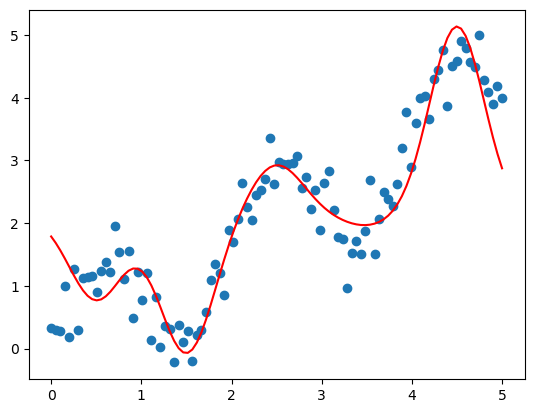

In [37]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [38]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.34600908 -2.19428046  0.81032875 -0.16806619  3.01475751]
interception:  2.1235530841308723


#### Comparison

In [39]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

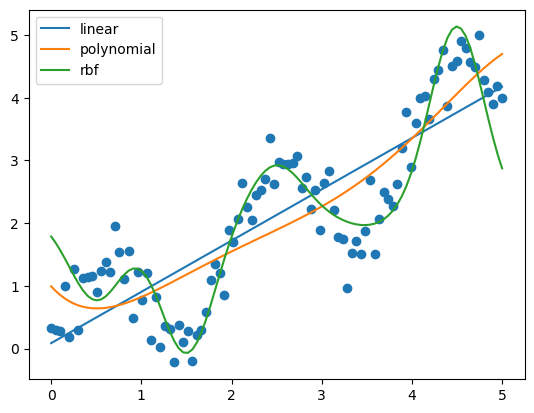

In [40]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [41]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5691830896312023


In [42]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4931575956270687


In [43]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26442816926604357
